# 1. Getting The System Ready

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Loading The Data

In [8]:
# Load data
df = pd.read_csv("../data/Processed_Student_Performance.csv")

# Features and target
X = df.drop('GradeClass', axis=1)
y = df["GradeClass"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable
y_categorical = to_categorical(y, num_classes=5)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.25, random_state=42)

# 3. Train Deep Learning Model

In [9]:
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes for GradeClass

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\USER-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4213 - loss: 1.4082 - val_accuracy: 0.5635 - val_loss: 1.0478
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 1.0175 - val_accuracy: 0.6538 - val_loss: 0.9216
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - loss: 0.9012 - val_accuracy: 0.6906 - val_loss: 0.8604
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - loss: 0.8615 - val_accuracy: 0.7224 - val_loss: 0.8177
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.7723 - val_accuracy: 0.7375 - val_loss: 0.7925
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.7969 - val_accuracy: 0.7492 - val_loss: 0.7654
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7480 - loss: 0.7277 - val_accuracy: 0.7559 - val_loss: 0.7427
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.7108 - val_accuracy: 0.7642 - val_loss:

# 4. Visualize Training Results

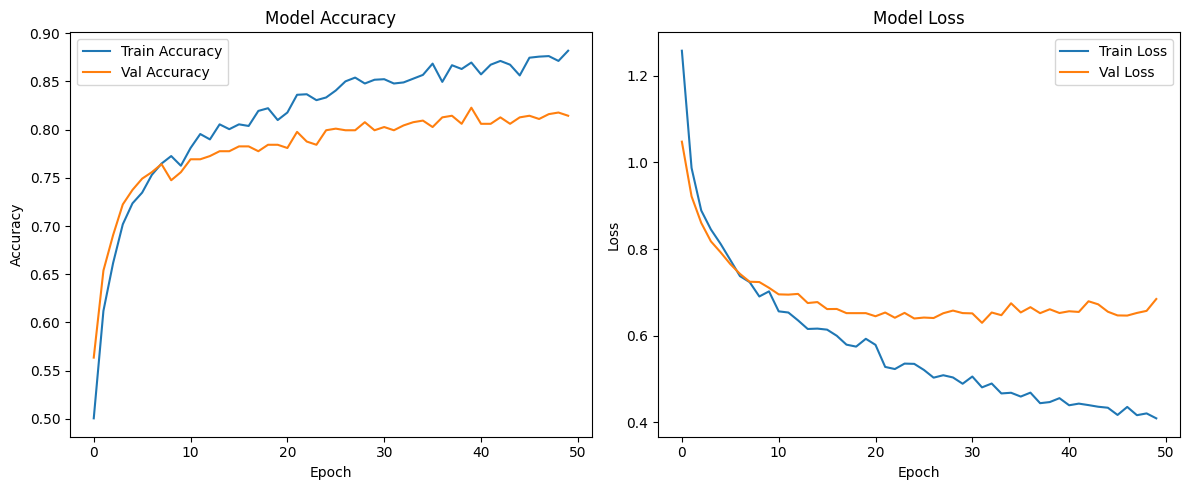

In [11]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.75      0.32      0.45        28
           1       0.69      0.71      0.70        68
           2       0.77      0.74      0.76       105
           3       0.76      0.65      0.70       104
           4       0.87      0.97      0.92       293

    accuracy                           0.81       598
   macro avg       0.77      0.68      0.71       598
weighted avg       0.81      0.81      0.81       598



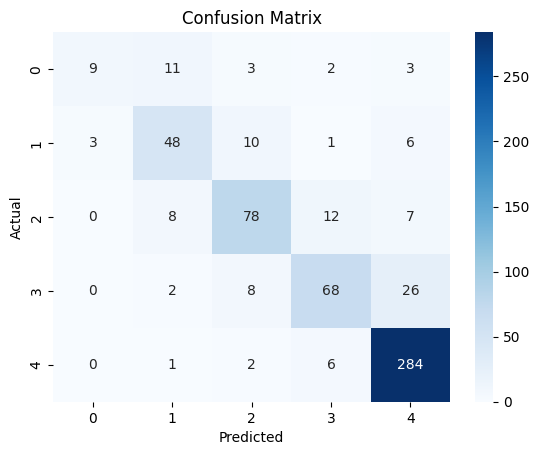

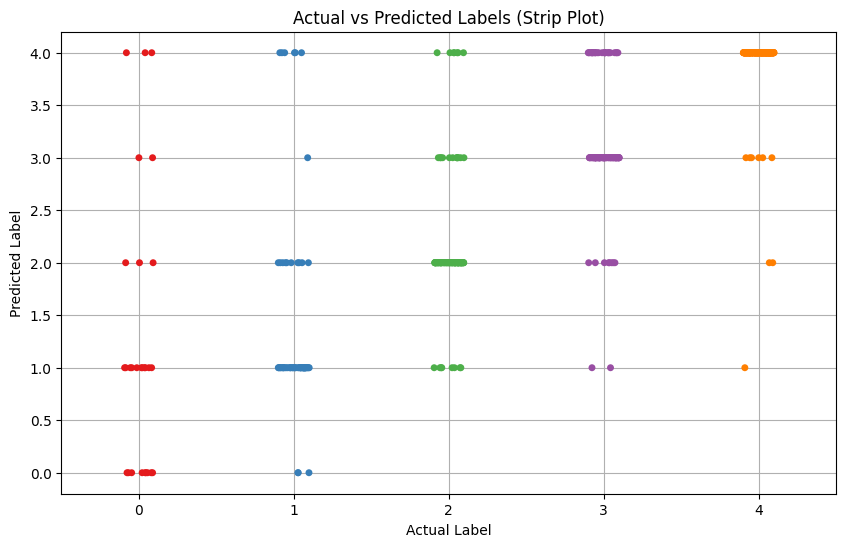

In [12]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Convert to DataFrame for visualization
df_results = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred
})

plt.figure(figsize=(10, 6))
sns.stripplot(x='Actual', y='Predicted', data=df_results, jitter=True, palette='Set1')
plt.title("Actual vs Predicted Labels (Strip Plot)")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.grid(True)
plt.show()

model.save('../artifacts/dl_model.h5')